In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''import os
import shutil
import random

# Tentukan path dataset
dataset_dir = '/content/drive/MyDrive/SC/bahan'  # Ganti dengan path folder dataset Anda
train_dir = '/content/drive/MyDrive/SC/ribuan/latih'  # Ganti dengan path folder train
val_dir = '/content/drive/MyDrive/SC/ribuan/validasi'  # Ganti dengan path folder validasi

# Membuat folder train dan validasi jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Fungsi untuk membagi gambar menjadi train dan validasi
def split_data(class_folder, train_folder, val_folder, train_ratio=0.8):
    # Ambil semua file gambar di dalam folder kelas
    images = [f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))]
    random.shuffle(images)  # Acak gambar agar pembagian lebih merata

    # Tentukan jumlah data untuk train dan validasi
    train_size = int(len(images) * train_ratio)

    # Pindahkan file gambar ke folder yang sesuai
    for i, image in enumerate(images):
        src = os.path.join(class_folder, image)
        if i < train_size:
            dst = os.path.join(train_folder, image)
        else:
            dst = os.path.join(val_folder, image)

        shutil.copy(src, dst)  # Salin gambar ke folder tujuan

# Daftarkan semua kelas (misalnya, folder untuk setiap kelas)
classes = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]

# Bagi data untuk setiap kelas
for class_name in classes:
    class_folder = os.path.join(dataset_dir, class_name)
    class_train_dir = os.path.join(train_dir, class_name)
    class_val_dir = os.path.join(val_dir, class_name)

    # Buat folder untuk kelas dalam train dan validasi jika belum ada
    os.makedirs(class_train_dir, exist_ok=True)
    os.makedirs(class_val_dir, exist_ok=True)

    # Panggil fungsi untuk membagi data
    split_data(class_folder, class_train_dir, class_val_dir)

print("Pembagian data selesai!")

Pembagian data selesai!


In [ ]:
import os

# Tentukan path folder train dan val
train_dir = '/content/drive/MyDrive/SC/ribuan/latih'  # Ganti dengan path folder train
val_dir = '/content/drive/MyDrive/SC/ribuan/validasi'  # Ganti dengan path folder validasi

# Fungsi untuk menghitung jumlah file dalam setiap folder
def count_files_per_folder(directory):
    folder_counts = {}
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)
        if os.path.isdir(subfolder_path):  # Periksa jika itu adalah folder
            file_count = len([f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))])
            folder_counts[subfolder] = file_count
    return folder_counts

# Hitung jumlah file di setiap folder dalam train dan val
train_counts = count_files_per_folder(train_dir)
val_counts = count_files_per_folder(val_dir)

# Cetak hasil
print("Jumlah file di setiap folder (train):")
for folder, count in train_counts.items():
    print(f"{folder}: {count} file")

print("\nJumlah file di setiap folder (val):")
for folder, count in val_counts.items():
    print(f"{folder}: {count} file")

Jumlah file di setiap folder (train):
cow: 192 file
dog: 192 file
cat: 192 file
elephant: 192 file
bat: 192 file
squirrel: 192 file
horse: 191 file
butterfly: 192 file
sheep: 192 file
tiger: 192 file

Jumlah file di setiap folder (val):
cow: 48 file
dog: 48 file
cat: 48 file
elephant: 48 file
bat: 48 file
squirrel: 48 file
horse: 48 file
butterfly: 48 file
sheep: 48 file
tiger: 48 file


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Menyiapkan Augmentasi Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 2. Memuat Data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/SC/ribuan/latih',  # Ganti dengan path data pelatihan Anda
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/SC/ribuan/validasi',  # Ganti dengan path data validasi Anda
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# 3. Membuat Model dengan Transfer Learning (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Membekukan semua layer base model (untuk fine-tuning bertahap)
base_model.trainable = False  # Semua layer base model dibekukan

# Membangun model dengan lapisan tambahan
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Regularisasi dropout
x = Dense(10, activation='softmax')(x)  # Sesuaikan dengan jumlah kelas Anda

# Final model
model = Model(inputs=base_model.input, outputs=x)

# 4. Kompilasi Model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

# 5. Melatih Model (tanpa callbacks)
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Menyimpan Model
# Menentukan versi model
version = 6
model_filename = f'model_v{version}.h5'

# Menyimpan model
model.save(model_filename)
print(f"Model disimpan ke: {model_filename}")

Found 1919 images belonging to 10 classes.
Found 480 images belonging to 10 classes.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.4973 - loss: 1.5667 - val_accuracy: 0.9417 - val_loss: 0.2354
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8581 - loss: 0.4520 - val_accuracy: 0.9750 - val_loss: 0.1173
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9069 - loss: 0.2712 - val_accuracy: 0.9958 - val_loss: 0.0718
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9383 - loss: 0.2035 - val_accuracy: 0.9812 - val_loss: 0.0510
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9510 - loss: 0.1700 - val_accuracy: 0.9917 - val_loss: 0.0407
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9533 - loss: 0.1396 - val_accuracy: 1.0000 - val_loss: 0.0239
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9647 - loss: 0.1167 - val_accuracy: 0.9979 - val_loss: 0.0200
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9713 - loss: 0.0895 - val_accuracy: 0.9979 - v

Model disimpan ke: model_v6.h5


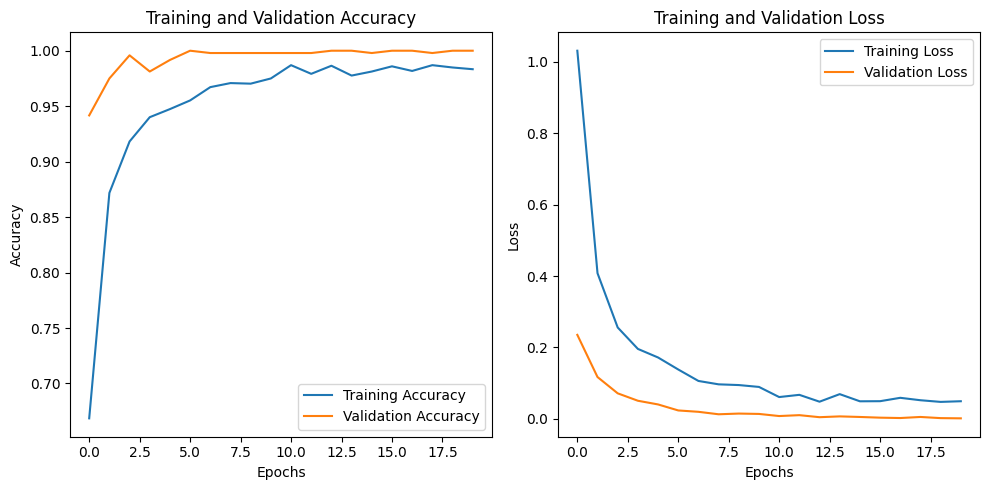

In [7]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from ipywidgets import FileUpload
from PIL import Image
import io
import numpy as np
import tensorflow as tf

# Daftar kelas yang sesuai dengan model Anda
class_names = ['bat', 'butterfly', 'cat', 'cow', 'sheep', 'dog', 'elephant', 'horse', 'squirrel','tiger']

# Load model (gunakan model Anda sendiri)
model = tf.keras.models.load_model('/content/model_v6.h5')

# Membuat widget untuk mengupload file
upload = FileUpload(accept='image/*', multiple=False)

# Fungsi untuk memproses gambar setelah diupload
def process_uploaded_image(change):
    # Mendapatkan file yang diupload
    img_data = next(iter(upload.value.values()))['content']

    # Membuka gambar dengan PIL
    img = Image.open(io.BytesIO(img_data))

    # Mengubah ukuran gambar sesuai input model (224x224)
    img_resized = img.resize((224, 224))

    # Mengubah gambar menjadi array numpy
    img_array = np.array(img_resized)

    # Menambah dimensi batch
    img_array = np.expand_dims(img_array, axis=0)

    # Normalisasi (sesuai dengan model yang digunakan)
    img_array = img_array / 255.0

    # Melakukan prediksi
    classes = model.predict(img_array)

    # Mengidentifikasi kelas berdasarkan prediksi
    predicted_class = np.argmax(classes, axis=1)

    # Menampilkan nama kelas prediksi
    predicted_class_name = class_names[predicted_class[0]]
    print(f'Predicted Class: {predicted_class_name}')

# Menyambungkan fungsi dengan upload event
upload.observe(process_uploaded_image, names='value')

# Tampilkan widget upload
display(upload)

FileUpload(value={}, accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: tiger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Class: squirrel
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Class: horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Class: cow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: butterfly
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: bat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class: sheep
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class: dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Class: elephant
